This is my baseline model building part of my capstone project 1.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_clean.csv',index_col='Game')

In [2]:
# As a recap, I'll examine the head for the dataset

df.head()

,H Fenwick Close,H GF,H GA,H GlDiff,H PP%,H PK%,H sh%,H sv%,H PDO,H win streak,...,A GlDiff,A PP%,A PK%,A sh%,A sv%,A PDO,A win streak,A standing,A 5-5 F/A,Home Win
Game,,,,,,,,,,,,,,,,,,,,,
2013-02-16 Tampa Bay at Florida,46.73,30,47,-17,18.9,74.5,937,901,964,-2,...,9,26.4,81.1,881,920,1039,-1,9,1.28,0
2013-02-16 Ottawa at Toronto,45.02,40,36,4,14.9,78.3,901,933,1032,-1,...,8,17.6,89.3,932,945,1013,-1,7,1.35,1
2013-02-16 Philadelphia at Montreal,52.03,36,33,3,20.3,81.5,921,931,1010,2,...,-8,18.3,80.6,933,911,978,-1,10,0.85,1
2013-02-16 New Jersey at NY Islanders,49.38,40,46,-6,25.0,88.1,912,873,961,1,...,9,20.7,82.8,904,929,1025,1,1,1.29,1
2013-02-16 Anaheim at Nashville,46.55,28,26,2,16.3,85.2,924,947,1023,2,...,12,21.4,70.0,870,933,1063,3,2,1.83,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Home Win'],axis=1), 
                                              df['Home Win'],random_state=1,stratify=df['Home Win'])

In [4]:
from sklearn.linear_model import LogisticRegression

Cs = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01,  0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
l1_accuracy = np.empty(len(Cs))
l2_accuracy = np.empty(len(Cs))

for i in range(len(l1_accuracy)):
    l1_accuracy[i] = 0
    l2_accuracy[i] = 0

count = 0
max_l1 = 0
max_l2 = 0
for val in Cs:
    clf_l1 = LogisticRegression(penalty='l1', C=val)
    clf_l2 = LogisticRegression(penalty='l2', C=val)
    clf_l1.fit(X_train,y_train)
    clf_l2.fit(X_train,y_train)
    l1_accuracy[count] = accuracy_score(clf_l1.predict(X_test), y_test)
    if (l1_accuracy[count] > l1_accuracy[max_l1]):
        max_l1 = count
    l2_accuracy[count] = accuracy_score(clf_l2.predict(X_test), y_test)
    if (l2_accuracy[count] > l2_accuracy[max_l2]):
        max_l2 = count
    print('Accuracy for L1 classifier at C {} is {:6f}'.format(val, l1_accuracy[count]))
    print('Accuracy for L2 classifier at C {} is {:6f}'.format(val, l2_accuracy[count]))
    count += 1
    
print('\nBest accuracy for L1 classifier is {:6f} at C {}'.format(np.max(l1_accuracy),Cs[max_l1]))
print('Best accuracy for L2 classifier is {:6f} at C {}'.format(np.max(l2_accuracy),Cs[max_l2]))

clf_best_lr_l1 = LogisticRegression(penalty='l1', C=Cs[max_l1])
clf_best_lr_l2 = LogisticRegression(penalty='l2', C=Cs[max_l2])
clf_best_lr_l1.fit(X_train,y_train)
clf_best_lr_l2.fit(X_train,y_train)

Accuracy for L1 classifier at C 1e-07 is 0.415385
Accuracy for L2 classifier at C 1e-07 is 0.584615
Accuracy for L1 classifier at C 1e-06 is 0.415385
Accuracy for L2 classifier at C 1e-06 is 0.584615
Accuracy for L1 classifier at C 1e-05 is 0.415385
Accuracy for L2 classifier at C 1e-05 is 0.553846
Accuracy for L1 classifier at C 0.0001 is 0.584615
Accuracy for L2 classifier at C 0.0001 is 0.515385
Accuracy for L1 classifier at C 0.001 is 0.584615
Accuracy for L2 classifier at C 0.001 is 0.546154
Accuracy for L1 classifier at C 0.01 is 0.546154
Accuracy for L2 classifier at C 0.01 is 0.538462
Accuracy for L1 classifier at C 0.1 is 0.553846
Accuracy for L2 classifier at C 0.1 is 0.561538
Accuracy for L1 classifier at C 1 is 0.553846
Accuracy for L2 classifier at C 1 is 0.561538
Accuracy for L1 classifier at C 10 is 0.561538
Accuracy for L2 classifier at C 10 is 0.561538
Accuracy for L1 classifier at C 100 is 0.546154
Accuracy for L2 classifier at C 100 is 0.561538
Accuracy for L1 classi

LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
print("[Final Training Classification Report Best L1 Regularization:]")
print(classification_report(y_train, clf_best_lr_l1.predict(X_train)))

print("[Final Test Classification Report Best L1 Regularization:]")
print(classification_report(y_test, clf_best_lr_l1.predict(X_test)))

print("[Final Training Classification Report Best L2 Regularization:]")
print(classification_report(y_train, clf_best_lr_l2.predict(X_train)))

print("[Final Test Classification Report Best L2 Regularization:]")
print(classification_report(y_test, clf_best_lr_l2.predict(X_test)))

[Final Training Classification Report Best L1 Regularization:]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       160
          1       0.59      1.00      0.74       227

avg / total       0.34      0.59      0.43       387

[Final Test Classification Report Best L1 Regularization:]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        54
          1       0.58      1.00      0.74        76

avg / total       0.34      0.58      0.43       130

[Final Training Classification Report Best L2 Regularization:]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       160
          1       0.59      1.00      0.74       227

avg / total       0.34      0.59      0.43       387

[Final Test Classification Report Best L2 Regularization:]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        54
    

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The precision and recall scores for home team losses for both types of regularization are terrible.  I'll have to see if I can figure out what is causing that.

In [6]:
df_coef_lr_l1 = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_lr_l1.coef_,24)})
df_coef_lr_l1 = df_coef_lr_l1.reindex(df_coef_lr_l1['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for L1 regularization:')
print(df_coef_lr_l1)

Estimated Coefficients for L1 regularization:
    estimated coefficients         features
8                 0.000245            H PDO
23                0.000000        A 5-5 F/A
22                0.000000       A standing
1                 0.000000             H GF
2                 0.000000             H GA
3                 0.000000         H GlDiff
4                 0.000000            H PP%
5                 0.000000            H PK%
6                 0.000000            H sh%
7                 0.000000            H sv%
9                 0.000000     H win streak
10                0.000000       H standing
11                0.000000        H 5-5 F/A
12                0.000000  A Fenwick Close
13                0.000000             A GF
14                0.000000             A GA
15                0.000000         A GlDiff
16                0.000000            A PP%
17                0.000000            A PK%
18                0.000000            A sh%
19                0.000000    

In [7]:
df_coef_lr_l2 = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_lr_l2.coef_,24)})
df_coef_lr_l2 = df_coef_lr_l2.reindex(df_coef_lr_l2['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for L2 regularization:')
print(df_coef_lr_l2)

Estimated Coefficients for L2 regularization:
    estimated coefficients         features
8             8.084613e-05            H PDO
7             6.991545e-05            H sv%
18            6.855500e-05            A sh%
6             5.785267e-05            H sh%
20            4.745208e-05            A PDO
19            4.722374e-05            A sv%
3             3.647036e-05         H GlDiff
5             1.120871e-05            H PK%
22            1.086889e-05       A standing
0             1.025682e-05  H Fenwick Close
9             5.211837e-06     H win streak
4             4.017041e-06            H PP%
17            2.351048e-06            A PK%
11            4.729917e-07        H 5-5 F/A
12           -1.344825e-07  A Fenwick Close
23           -3.042109e-07        A 5-5 F/A
21           -5.661848e-07     A win streak
16           -5.707842e-06            A PP%
10           -6.855501e-06       H standing
14           -7.309082e-06             A GA
1            -1.822596e-05    

And again, for both regularizations, the estimated coefficients are also terrible.

In [8]:
# However, when using the best C values, both the classifiers' estimated coefficients were mostly zeroes or close to zero,
# so I manually tested several C values and found that these provided the best results overall for each classifier

max_l1 = 1000000
max_l2 = 1000000

clf_best_lr_l1 = LogisticRegression(penalty='l1', C=max_l1)
clf_best_lr_l2 = LogisticRegression(penalty='l2', C=max_l2)
clf_best_lr_l1.fit(X_train,y_train)
clf_best_lr_l2.fit(X_train,y_train)

print("[Final Training Classification Report Best L1 Regularization:]")
print(classification_report(y_train, clf_best_lr_l1.predict(X_train)))

print("[Final Test Classification Report Best L1 Regularization:]")
print(classification_report(y_test, clf_best_lr_l1.predict(X_test)))

print("[Final Training Classification Report Best L2 Regularization:]")
print(classification_report(y_train, clf_best_lr_l2.predict(X_train)))

print("[Final Test Classification Report Best Logistic Regression:]")
print(classification_report(y_test, clf_best_lr_l2.predict(X_test)))

[Final Training Classification Report Best L1 Regularization:]
             precision    recall  f1-score   support

          0       0.60      0.31      0.41       160
          1       0.64      0.86      0.73       227

avg / total       0.62      0.63      0.60       387

[Final Test Classification Report Best L1 Regularization:]
             precision    recall  f1-score   support

          0       0.44      0.28      0.34        54
          1       0.59      0.75      0.66        76

avg / total       0.53      0.55      0.53       130

[Final Training Classification Report Best L2 Regularization:]
             precision    recall  f1-score   support

          0       0.61      0.31      0.41       160
          1       0.64      0.86      0.73       227

avg / total       0.63      0.63      0.60       387

[Final Test Classification Report Best Logistic Regression:]
             precision    recall  f1-score   support

          0       0.46      0.30      0.36        54
  

Those scores are better, but still very low.  Time to check the estimated coefficients.

In [9]:
df_coef_lr_l1 = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_lr_l1.coef_,24)})
df_coef_lr_l1 = df_coef_lr_l1.reindex(df_coef_lr_l1['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for L1 regularization:')
print(df_coef_lr_l1)

Estimated Coefficients for L1 regularization:
    estimated coefficients         features
11                0.348112        H 5-5 F/A
9                 0.062687     H win streak
22                0.037380       A standing
21                0.031342     A win streak
12                0.030932  A Fenwick Close
10                0.027438       H standing
0                 0.023219  H Fenwick Close
5                 0.017355            H PK%
3                 0.011010         H GlDiff
17                0.009707            A PK%
4                 0.009428            H PP%
20                0.007410            A PDO
6                 0.001155            H sh%
13               -0.000359             A GF
19               -0.001039            A sv%
14               -0.001143             A GA
1                -0.001978             H GF
2                -0.002101             H GA
8                -0.002403            H PDO
7                -0.003540            H sv%
18               -0.008617    

In [10]:
df_coef_lr_l2 = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_lr_l2.coef_,24)})
df_coef_lr_l2 = df_coef_lr_l2.reindex(df_coef_lr_l2['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for L2 regularization:')
print(df_coef_lr_l2)

Estimated Coefficients for L2 regularization:
    estimated coefficients         features
9                 0.064105     H win streak
22                0.037798       A standing
21                0.032886     A win streak
12                0.029381  A Fenwick Close
0                 0.028720  H Fenwick Close
10                0.026412       H standing
5                 0.015126            H PK%
17                0.010823            A PK%
3                 0.008567         H GlDiff
20                0.007957            A PDO
4                 0.007557            H PP%
14                0.006323             A GA
1                 0.002454             H GF
11                0.002350        H 5-5 F/A
6                 0.000306            H sh%
23                0.000273        A 5-5 F/A
8                -0.000891            H PDO
19               -0.002146            A sv%
7                -0.002845            H sv%
2                -0.006113             H GA
18               -0.007843    

Those look much better.  Time to try other classifiers.

In [11]:
from sklearn.ensemble import RandomForestClassifier

sr_accuracy = np.empty(91)
lg_accuracy = np.empty(91)
no_accuracy = np.empty(91)

for i in range(len(sr_accuracy)):
    sr_accuracy[i] = 0
    lg_accuracy[i] = 0
    no_accuracy[i] = 0

count = 0
max_sr = 0
max_lg = 0
max_no = 0
for val in np.arange(10,100):
    clf_sr = RandomForestClassifier(max_features='sqrt',n_estimators=val,oob_score=True)
    clf_lg = RandomForestClassifier(max_features='log2',n_estimators=val,oob_score=True)
    clf_no = RandomForestClassifier(max_features=None,n_estimators=val,oob_score=True)
    clf_sr.fit(X_train,y_train)
    clf_lg.fit(X_train,y_train)
    clf_no.fit(X_train,y_train)
    sr_accuracy[count] = clf_sr.oob_score_
    if (sr_accuracy[count] > sr_accuracy[max_sr]):
        max_sr = count
    lg_accuracy[count] = clf_lg.oob_score_
    if (lg_accuracy[count] > lg_accuracy[max_lg]):
        max_lg = count
    no_accuracy[count] = clf_no.oob_score_
    if (no_accuracy[count] > no_accuracy[max_no]):
        max_no = count
    #print('Accuracy for sqrt classifier at C {} is {:6f}'.format(val, sr_accuracy[count]))
    #print('Accuracy for log2 classifier at C {} is {:6f}'.format(val, lg_accuracy[count]))
    #print('Accuracy for None classifier at C {} is {:6f}'.format(val, no_accuracy[count]))
    count += 1
    
print('Best oob score for sqrt classifier is {:6f} at {} estimators'.format(np.max(sr_accuracy),max_sr))
print('Best oob score for log2 classifier is {:6f} at {} estimators'.format(np.max(lg_accuracy),max_lg))
print('Best oob score for None classifier is {:6f} at {} estimators'.format(np.max(no_accuracy),max_no))

clf_best_rf_sr = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_best_rf_lg = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_best_rf_no = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_best_rf_sr.fit(X_train,y_train)
clf_best_rf_lg.fit(X_train,y_train)
clf_best_rf_no.fit(X_train,y_train)

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do no

Best oob score for sqrt classifier is 0.591731 at 72 estimators
Best oob score for log2 classifier is 0.599483 at 81 estimators
Best oob score for None classifier is 0.586563 at 74 estimators


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
print("[Final Training Classification Report Best sqrt Random Forest:]")
print(classification_report(y_train, clf_best_rf_sr.predict(X_train)))

print("[Final Test Classification Report Best sqrt Random Forest:]")
print(classification_report(y_test, clf_best_rf_sr.predict(X_test)))

print("[Final Training Classification Report Best log2 Random Forest:]")
print(classification_report(y_train, clf_best_rf_lg.predict(X_train)))

print("[Final Test Classification Report Best log2 Random Forest:]")
print(classification_report(y_test, clf_best_rf_lg.predict(X_test)))

print("[Final Training Classification Report Best None Random Forest:]")
print(classification_report(y_train, clf_best_rf_no.predict(X_train)))

print("[Final Test Classification Report Best Random Forest:]")
print(classification_report(y_test, clf_best_rf_no.predict(X_test)))

[Final Training Classification Report Best sqrt Random Forest:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       160
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       387

[Final Test Classification Report Best sqrt Random Forest:]
             precision    recall  f1-score   support

          0       0.47      0.44      0.46        54
          1       0.62      0.64      0.63        76

avg / total       0.56      0.56      0.56       130

[Final Training Classification Report Best log2 Random Forest:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       160
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       387

[Final Test Classification Report Best log2 Random Forest:]
             precision    recall  f1-score   support

          0       0.45      0.37      0.41        54


The test scores look similar to the logistic regression scores.  Looks like there is still room for improvement.

In [13]:
df_coef_rf_sr = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_rf_sr.feature_importances_,24)})
df_coef_rf_sr = df_coef_rf_sr.reindex(df_coef_rf_sr['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for sqrt trees:')
print(df_coef_rf_sr)

Estimated Coefficients for sqrt trees:
    estimated coefficients         features
16                0.055766            A PP%
12                0.051189  A Fenwick Close
4                 0.050735            H PP%
1                 0.049783             H GF
2                 0.049543             H GA
0                 0.047374  H Fenwick Close
17                0.046622            A PK%
23                0.045855        A 5-5 F/A
20                0.045059            A PDO
14                0.044780             A GA
13                0.042027             A GF
6                 0.041994            H sh%
22                0.041975       A standing
15                0.040958         A GlDiff
19                0.039828            A sv%
7                 0.039696            H sv%
8                 0.039600            H PDO
5                 0.038353            H PK%
18                0.037192            A sh%
11                0.036669        H 5-5 F/A
3                 0.036396         H 

In [14]:
df_coef_rf_lg = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_rf_lg.feature_importances_,24)})
df_coef_rf_lg = df_coef_rf_lg.reindex(df_coef_rf_lg['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for log2 trees:')
print(df_coef_rf_lg)

Estimated Coefficients for log2 trees:
    estimated coefficients         features
17                0.057984            A PK%
4                 0.051924            H PP%
16                0.051770            A PP%
0                 0.049906  H Fenwick Close
2                 0.048749             H GA
1                 0.048100             H GF
14                0.047537             A GA
13                0.045921             A GF
5                 0.045155            H PK%
20                0.044998            A PDO
12                0.043469  A Fenwick Close
19                0.042758            A sv%
15                0.042433         A GlDiff
18                0.042339            A sh%
23                0.041735        A 5-5 F/A
6                 0.039745            H sh%
8                 0.036534            H PDO
7                 0.035427            H sv%
3                 0.034550         H GlDiff
11                0.034517        H 5-5 F/A
22                0.030189       A st

In [15]:
df_coef_rf_no = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_best_rf_no.feature_importances_,24)})
df_coef_rf_no = df_coef_rf_no.reindex(df_coef_rf_no['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for None trees:')
print(df_coef_rf_no)

Estimated Coefficients for None trees:
    estimated coefficients         features
16                0.065051            A PP%
17                0.060591            A PK%
12                0.055819  A Fenwick Close
2                 0.055715             H GA
0                 0.053044  H Fenwick Close
5                 0.051834            H PK%
4                 0.051357            H PP%
1                 0.047083             H GF
20                0.045215            A PDO
13                0.044887             A GF
23                0.040961        A 5-5 F/A
6                 0.040903            H sh%
19                0.040891            A sv%
18                0.039127            A sh%
7                 0.037815            H sv%
15                0.034955         A GlDiff
8                 0.033794            H PDO
14                0.031108             A GA
3                 0.030353         H GlDiff
22                0.029933       A standing
9                 0.029723     H win 

In [16]:
# Now to train logistic regression classifiers with the data the original authors didn't use and the extra data I entered

dfex = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_clean_with_na.csv',index_col='Game')
dfex.head()

,H Fenwick Close,H GF,H GA,H GlDiff,H PP%,H PK%,H sh%,H sv%,H PDO,H win streak,...,A sh%,A sv%,A PDO,A win streak,A standing,A 5-5 F/A,A Rest,A Travel,A Travel per Day,Home Win
Game,,,,,,,,,,,,,,,,,,,,,
2013-02-08 Anaheim at Dallas,48.44,22,27,-5,13.9,83.3,930,940,1010,2,...,878,933,1055,4,2,1.024662,2,663,331.5,1
2013-02-09 Pittsburgh at New Jersey,51.87,27,21,6,19.0,87.8,914,926,1012,3,...,909,924,1015,5,1,1.024662,2,306,153.0,1
2013-02-09 Carolina at Philadelphia,52.68,25,29,-4,18.4,76.0,935,940,1005,-1,...,935,930,995,2,8,1.024662,2,379,189.5,1
2013-02-09 Winnipeg at Ottawa,56.28,31,21,10,25.0,89.1,924,942,1018,-1,...,926,900,974,-1,11,1.024662,2,1042,521.0,0
2013-02-09 Edmonton at Detroit,54.49,27,29,-2,12.0,69.6,922,937,1015,1,...,954,921,967,-2,8,1.024662,3,1593,531.0,1


In [17]:
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(dfex.drop(['Home Win'],axis=1), 
                                              dfex['Home Win'],random_state=1,stratify=dfex['Home Win'])

clf_lr_l1_ex = LogisticRegression(penalty='l1', C=max_l1)
clf_lr_l1_ex.fit(X_train_ex,y_train_ex)
clf_lr_l2_ex = LogisticRegression(penalty='l2', C=max_l2)
clf_lr_l2_ex.fit(X_train_ex,y_train_ex)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
print("[Final Training Classification Report Best L1 Regularization with extra data:]")
print(classification_report(y_train_ex, clf_lr_l1_ex.predict(X_train_ex)))

print("[Final Test Classification Report Best L1 Regularization with extra data:]")
print(classification_report(y_test_ex, clf_lr_l1_ex.predict(X_test_ex)))

print("[Final Training Classification Report Best L2 Regularization with extra data:]")
print(classification_report(y_train_ex, clf_lr_l2_ex.predict(X_train_ex)))

print("[Final Test Classification Report Best L2 Regularization with extra data:]")
print(classification_report(y_test_ex, clf_lr_l2_ex.predict(X_test_ex)))

[Final Training Classification Report Best L1 Regularization with extra data:]
             precision    recall  f1-score   support

          0       0.60      0.39      0.47       182
          1       0.64      0.81      0.71       244

avg / total       0.62      0.63      0.61       426

[Final Test Classification Report Best L1 Regularization with extra data:]
             precision    recall  f1-score   support

          0       0.48      0.38      0.42        61
          1       0.60      0.69      0.64        81

avg / total       0.55      0.56      0.55       142

[Final Training Classification Report Best L2 Regularization with extra data:]
             precision    recall  f1-score   support

          0       0.61      0.38      0.47       182
          1       0.64      0.82      0.72       244

avg / total       0.63      0.63      0.61       426

[Final Test Classification Report Best L2 Regularization with extra data:]
             precision    recall  f1-score   su

In [19]:
clf_rf_sr_ex = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_rf_lg_ex = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_rf_no_ex = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_rf_sr_ex.fit(X_train_ex,y_train_ex)
clf_rf_lg_ex.fit(X_train_ex,y_train_ex)
clf_rf_no_ex.fit(X_train_ex,y_train_ex)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print("[Final Training Classification Report Best sqrt Random Forest:]")
print(classification_report(y_train_ex, clf_rf_sr_ex.predict(X_train_ex)))

print("[Final Test Classification Report Best sqrt Random Forest:]")
print(classification_report(y_test_ex, clf_rf_sr_ex.predict(X_test_ex)))

print("[Final Training Classification Report Best log2 Random Forest:]")
print(classification_report(y_train_ex, clf_rf_lg_ex.predict(X_train_ex)))

print("[Final Test Classification Report Best log2 Random Forest:]")
print(classification_report(y_test_ex, clf_rf_lg_ex.predict(X_test_ex)))

print("[Final Training Classification Report Best None Random Forest:]")
print(classification_report(y_train_ex, clf_rf_no_ex.predict(X_train_ex)))

print("[Final Test Classification Report Best None Random Forest:]")
print(classification_report(y_test_ex, clf_rf_no_ex.predict(X_test_ex)))

[Final Training Classification Report Best sqrt Random Forest:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       182
          1       1.00      1.00      1.00       244

avg / total       1.00      1.00      1.00       426

[Final Test Classification Report Best sqrt Random Forest:]
             precision    recall  f1-score   support

          0       0.49      0.31      0.38        61
          1       0.59      0.75      0.66        81

avg / total       0.55      0.56      0.54       142

[Final Training Classification Report Best log2 Random Forest:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       182
          1       1.00      1.00      1.00       244

avg / total       1.00      1.00      1.00       426

[Final Test Classification Report Best log2 Random Forest:]
             precision    recall  f1-score   support

          0       0.49      0.30      0.37        61


Even using the extra data doesn't produce anything better.  What about a different size training split?

In [21]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(df.drop(['Home Win'],axis=1), 
                                              df['Home Win'],random_state=1,stratify=df['Home Win'],train_size=0.7)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(df.drop(['Home Win'],axis=1), 
                                              df['Home Win'],random_state=1,stratify=df['Home Win'],train_size=0.8)

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
clf_lr_l1_70 = LogisticRegression(penalty='l1', C=max_l1)
clf_lr_l1_70.fit(X_train_70,y_train_70)
clf_lr_l2_70 = LogisticRegression(penalty='l2', C=max_l2)
clf_lr_l2_70.fit(X_train_70,y_train_70)
clf_lr_l1_80 = LogisticRegression(penalty='l1', C=max_l1)
clf_lr_l1_80.fit(X_train_80,y_train_80)
clf_lr_l2_80 = LogisticRegression(penalty='l2', C=max_l2)
clf_lr_l2_80.fit(X_train_80,y_train_80)
clf_rf_sr_70 = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_rf_sr_70.fit(X_train_70, y_train_70)
clf_rf_lg_70 = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_rf_lg_70.fit(X_train_70, y_train_70)
clf_rf_no_70 = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_rf_no_70.fit(X_train_70, y_train_70)
clf_rf_sr_80 = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_rf_sr_80.fit(X_train_80, y_train_80)
clf_rf_lg_80 = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_rf_lg_80.fit(X_train_80, y_train_80)
clf_rf_no_80 = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_rf_no_80.fit(X_train_80, y_train_80)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
print("[Final Training Classification Report L1 Regularization 70% train:]")
print(classification_report(y_train_70, clf_lr_l1_70.predict(X_train_70)))

print("[Final Test Classification Report L1 Regularization 70% train:]")
print(classification_report(y_test_70, clf_lr_l1_70.predict(X_test_70)))

print("[Final Training Classification Report L1 Regularization 80% train:]")
print(classification_report(y_train_80, clf_lr_l1_80.predict(X_train_80)))

print("[Final Test Classification Report L1 Regularization 80% train:]")
print(classification_report(y_test_80, clf_lr_l1_80.predict(X_test_80)))

print("[Final Training Classification Report L2 Regularization 70% train:]")
print(classification_report(y_train_70, clf_lr_l2_70.predict(X_train_70)))

print("[Final Test Classification Report L2 Regularization 70% train:]")
print(classification_report(y_test_70, clf_lr_l2_70.predict(X_test_70)))

print("[Final Training Classification Report L2 Regularization 80% train:]")
print(classification_report(y_train_80, clf_lr_l2_80.predict(X_train_80)))

print("[Final Test Classification Report L2 Regularization 80% train:]")
print(classification_report(y_test_80, clf_lr_l2_80.predict(X_test_80)))

[Final Training Classification Report L1 Regularization 70% train:]
             precision    recall  f1-score   support

          0       0.62      0.34      0.43       149
          1       0.65      0.85      0.74       212

avg / total       0.63      0.64      0.61       361

[Final Test Classification Report L1 Regularization 70% train:]
             precision    recall  f1-score   support

          0       0.41      0.26      0.32        65
          1       0.58      0.74      0.65        91

avg / total       0.51      0.54      0.51       156

[Final Training Classification Report L1 Regularization 80% train:]
             precision    recall  f1-score   support

          0       0.59      0.33      0.43       171
          1       0.64      0.84      0.73       242

avg / total       0.62      0.63      0.60       413

[Final Test Classification Report L1 Regularization 80% train:]
             precision    recall  f1-score   support

          0       0.41      0.26     

In [24]:
print("[Final Training Classification Report sqrt Random Forest 70% train:]")
print(classification_report(y_train_70, clf_rf_sr_70.predict(X_train_70)))

print("[Final Test Classification Report sqrt Random Forest 70% train:]")
print(classification_report(y_test_70, clf_rf_sr_70.predict(X_test_70)))

print("[Final Training Classification Report sqrt Random Forest 80% train:]")
print(classification_report(y_train_80, clf_rf_sr_80.predict(X_train_80)))

print("[Final Test Classification Report sqrt Random Forest 80% train:]")
print(classification_report(y_test_80, clf_rf_sr_80.predict(X_test_80)))

print("[Final Training Classification Report log2 Random Forest 70% train:]")
print(classification_report(y_train_70, clf_rf_lg_70.predict(X_train_70)))

print("[Final Test Classification Report log2 Random Forest 70% train:]")
print(classification_report(y_test_70, clf_rf_lg_70.predict(X_test_70)))

print("[Final Training Classification Report log2 Random Forest 80% train:]")
print(classification_report(y_train_80, clf_rf_lg_80.predict(X_train_80)))

print("[Final Test Classification Report log2 Random Forest 80% train:]")
print(classification_report(y_test_80, clf_rf_lg_80.predict(X_test_80)))

print("[Final Training Classification Report None Random Forest 70% train:]")
print(classification_report(y_train_70, clf_rf_no_70.predict(X_train_70)))

print("[Final Test Classification Report None Random Forest 70% train:]")
print(classification_report(y_test_70, clf_rf_no_70.predict(X_test_70)))

print("[Final Training Classification Report None Random Forest 80% train:]")
print(classification_report(y_train_80, clf_rf_no_80.predict(X_train_80)))

print("[Final Test Classification Report None Random Forest 80% train:]")
print(classification_report(y_test_80, clf_rf_no_80.predict(X_test_80)))

[Final Training Classification Report sqrt Random Forest 70% train:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       149
          1       1.00      1.00      1.00       212

avg / total       1.00      1.00      1.00       361

[Final Test Classification Report sqrt Random Forest 70% train:]
             precision    recall  f1-score   support

          0       0.43      0.29      0.35        65
          1       0.59      0.73      0.65        91

avg / total       0.52      0.54      0.52       156

[Final Training Classification Report sqrt Random Forest 80% train:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       171
          1       1.00      1.00      1.00       242

avg / total       1.00      1.00      1.00       413

[Final Test Classification Report sqrt Random Forest 80% train:]
             precision    recall  f1-score   support

          0       0.47      0.40 

Still no real difference.  Maybe some resampling of the data.

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_oversampled, y_oversampled = ros.fit_sample(df.drop(['Home Win'],axis=1), df['Home Win'])

df_over = pd.DataFrame(X_oversampled)
df_over['Home Win'] = y_oversampled

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(df_over.drop(['Home Win'],axis=1), 
                                              df_over['Home Win'],random_state=1,stratify=df_over['Home Win'])

clf_l1_over = LogisticRegression(penalty='l1', C=max_l1)
clf_l1_over.fit(X_train_o,y_train_o)
clf_l2_over = LogisticRegression(penalty='l2', C=max_l2)
clf_l2_over.fit(X_train_o,y_train_o)
clf_sr_over = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_sr_over.fit(X_train_o,y_train_o)
clf_lg_over = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_lg_over.fit(X_train_o,y_train_o)
clf_no_over = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_no_over.fit(X_train_o,y_train_o)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print("[Final Train Classification Report L1 Regularization naive over-resampled data:]")
print(classification_report(y_train_o, clf_l1_over.predict(X_train_o)))

print("[Final Test Classification Report L1 Regularization naive over-resampled data:]")
print(classification_report(y_test_o, clf_l1_over.predict(X_test_o)))

print("[Final Train Classification Report L2 Regularization naive over-resampled data:]")
print(classification_report(y_train_o, clf_l2_over.predict(X_train_o)))

print("[Final Test Classification Report L2 Regularization naive over-resampled data:]")
print(classification_report(y_test_o, clf_l2_over.predict(X_test_o)))

[Final Train Classification Report L1 Regularization naive over-resampled data:]
             precision    recall  f1-score   support

          0       0.61      0.63      0.62       227
          1       0.62      0.60      0.61       227

avg / total       0.61      0.61      0.61       454

[Final Test Classification Report L1 Regularization naive over-resampled data:]
             precision    recall  f1-score   support

          0       0.57      0.66      0.61        76
          1       0.59      0.50      0.54        76

avg / total       0.58      0.58      0.58       152

[Final Train Classification Report L2 Regularization naive over-resampled data:]
             precision    recall  f1-score   support

          0       0.62      0.63      0.62       227
          1       0.62      0.61      0.62       227

avg / total       0.62      0.62      0.62       454

[Final Test Classification Report L2 Regularization naive over-resampled data:]
             precision    recall 

In [27]:
print("[Final Training Classification Report Best sqrt Random Forest naive over-resampled data:]")
print(classification_report(y_train_o, clf_sr_over.predict(X_train_o)))

print("[Final Test Classification Report Best sqrt Random Forest naive over-resampled data:]")
print(classification_report(y_test_o, clf_sr_over.predict(X_test_o)))

print("[Final Training Classification Report Best log2 Random Forest naive over-resampled data:]")
print(classification_report(y_train_o, clf_lg_over.predict(X_train_o)))

print("[Final Test Classification Report Best log2 Random Forest naive over-resampled data:]")
print(classification_report(y_test_o, clf_lg_over.predict(X_test_o)))

print("[Final Training Classification Report Best None Random Forest naive over-resampled data:]")
print(classification_report(y_train_o, clf_no_over.predict(X_train_o)))

print("[Final Test Classification Report Best None Random Forest naive over-resampled data:]")
print(classification_report(y_test_o, clf_no_over.predict(X_test_o)))

[Final Training Classification Report Best sqrt Random Forest naive over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       454

[Final Test Classification Report Best sqrt Random Forest naive over-resampled data:]
             precision    recall  f1-score   support

          0       0.61      0.72      0.66        76
          1       0.66      0.54      0.59        76

avg / total       0.64      0.63      0.63       152

[Final Training Classification Report Best log2 Random Forest naive over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       454

[Final Test Classification Report Best log2 Random Forest naive over-resampled data:]
   

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_undersampled, y_undersampled = rus.fit_sample(df.drop(['Home Win'],axis=1), df['Home Win'])

df_under = pd.DataFrame(X_undersampled)
df_under['Home Win'] = y_undersampled

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(df_under.drop(['Home Win'],axis=1), 
                                              df_under['Home Win'],random_state=1,stratify=df_under['Home Win'])

clf_l1_under = LogisticRegression(penalty='l1', C=max_l1)
clf_l1_under.fit(X_train_u,y_train_u)
clf_l2_under = LogisticRegression(penalty='l2', C=max_l2)
clf_l2_under.fit(X_train_u,y_train_u)
clf_sr_under = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_sr_under.fit(X_train_u,y_train_u)
clf_lg_under = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_lg_under.fit(X_train_u,y_train_u)
clf_no_under = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_no_under.fit(X_train_u,y_train_u)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
print("[Final Train Classification Report L1 Regularization under-resampled data:]")
print(classification_report(y_train_u, clf_l1_under.predict(X_train_u)))

print("[Final Test Classification Report L1 Regularization under-resampled data:]")
print(classification_report(y_test_u, clf_l1_under.predict(X_test_u)))

print("[Final Train Classification Report L2 Regularization under-resampled data:]")
print(classification_report(y_train_u, clf_l2_under.predict(X_train_u)))

print("[Final Test Classification Report L2 Regularization under-resampled data:]")
print(classification_report(y_test_u, clf_l2_under.predict(X_test_u)))

[Final Train Classification Report L1 Regularization under-resampled data:]
             precision    recall  f1-score   support

          0       0.58      0.58      0.58       161
          1       0.58      0.58      0.58       160

avg / total       0.58      0.58      0.58       321

[Final Test Classification Report L1 Regularization under-resampled data:]
             precision    recall  f1-score   support

          0       0.58      0.58      0.58        53
          1       0.59      0.59      0.59        54

avg / total       0.59      0.59      0.59       107

[Final Train Classification Report L2 Regularization under-resampled data:]
             precision    recall  f1-score   support

          0       0.57      0.57      0.57       161
          1       0.57      0.57      0.57       160

avg / total       0.57      0.57      0.57       321

[Final Test Classification Report L2 Regularization under-resampled data:]
             precision    recall  f1-score   support


In [30]:
print("[Final Training Classification Report Best sqrt Random Forest under-resampled data:]")
print(classification_report(y_train_u, clf_sr_under.predict(X_train_u)))

print("[Final Test Classification Report Best sqrt Random Forest under-resampled data:]")
print(classification_report(y_test_u, clf_sr_under.predict(X_test_u)))

print("[Final Training Classification Report Best log2 Random Forest under-resampled data:]")
print(classification_report(y_train_u, clf_lg_under.predict(X_train_u)))

print("[Final Test Classification Report Best log2 Random Forest under-resampled data:]")
print(classification_report(y_test_u, clf_lg_under.predict(X_test_u)))

print("[Final Training Classification Report Best None Random Forest under-resampled data:]")
print(classification_report(y_train_u, clf_no_under.predict(X_train_u)))

print("[Final Test Classification Report Best None Random Forest under-resampled data:]")
print(classification_report(y_test_u, clf_no_under.predict(X_test_u)))

[Final Training Classification Report Best sqrt Random Forest under-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       161
          1       1.00      1.00      1.00       160

avg / total       1.00      1.00      1.00       321

[Final Test Classification Report Best sqrt Random Forest under-resampled data:]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60        53
          1       0.60      0.56      0.58        54

avg / total       0.59      0.59      0.59       107

[Final Training Classification Report Best log2 Random Forest under-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       161
          1       1.00      1.00      1.00       160

avg / total       1.00      1.00      1.00       321

[Final Test Classification Report Best log2 Random Forest under-resampled data:]
             precision 

In [31]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_sample(df.drop(['Home Win'],axis=1), df['Home Win'])

df_smote = pd.DataFrame(X_smote)
df_smote['Home Win'] = y_smote

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_smote.drop(['Home Win'],axis=1), 
                                              df_smote['Home Win'],random_state=1,stratify=df_smote['Home Win'])

clf_l1_smote = LogisticRegression(penalty='l1', C=max_l1)
clf_l1_smote.fit(X_train_s,y_train_s)
clf_l2_smote = LogisticRegression(penalty='l2', C=max_l2)
clf_l2_smote.fit(X_train_s,y_train_s)
clf_sr_smote = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_sr_smote.fit(X_train_s,y_train_s)
clf_lg_smote = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_lg_smote.fit(X_train_s,y_train_s)
clf_no_smote = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_no_smote.fit(X_train_s,y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
print("[Final Train Classification Report L1 Regularization SMOTE over-resampled data:]")
print(classification_report(y_train_s, clf_l1_smote.predict(X_train_s)))

print("[Final Test Classification Report L1 Regularization SMOTE over-resampled data:]")
print(classification_report(y_test_s, clf_l1_smote.predict(X_test_s)))

print("[Final Train Classification Report L2 Regularization SMOTE over-resampled data:]")
print(classification_report(y_train_s, clf_l2_smote.predict(X_train_s)))

print("[Final Test Classification Report L2 Regularization SMOTE over-resampled data:]")
print(classification_report(y_test_s, clf_l2_smote.predict(X_test_s)))

[Final Train Classification Report L1 Regularization SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       0.64      0.64      0.64       227
          1       0.64      0.63      0.64       227

avg / total       0.64      0.64      0.64       454

[Final Test Classification Report L1 Regularization SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       0.50      0.58      0.54        76
          1       0.50      0.42      0.46        76

avg / total       0.50      0.50      0.50       152

[Final Train Classification Report L2 Regularization SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       0.61      0.63      0.62       227
          1       0.62      0.60      0.61       227

avg / total       0.62      0.62      0.62       454

[Final Test Classification Report L2 Regularization SMOTE over-resampled data:]
             precision    recall 

In [33]:
print("[Final Training Classification Report Best sqrt Random Forest SMOTE over-resampled data:]")
print(classification_report(y_train_s, clf_sr_smote.predict(X_train_s)))

print("[Final Test Classification Report Best Random Forest SMOTE over-resampled data:]")
print(classification_report(y_test_s, clf_sr_smote.predict(X_test_s)))

print("[Final Training Classification Report Best log2 Random Forest SMOTE over-resampled data:]")
print(classification_report(y_train_s, clf_lg_smote.predict(X_train_s)))

print("[Final Test Classification Report Best log2 Random Forest SMOTE over-resampled data:]")
print(classification_report(y_test_s, clf_lg_smote.predict(X_test_s)))

print("[Final Training Classification Report Best None Random Forest SMOTE over-resampled data:]")
print(classification_report(y_train_s, clf_no_smote.predict(X_train_s)))

print("[Final Test Classification Report Best None Random Forest SMOTE over-resampled data:]")
print(classification_report(y_test_s, clf_no_smote.predict(X_test_s)))

[Final Training Classification Report Best sqrt Random Forest SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       454

[Final Test Classification Report Best Random Forest SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       0.60      0.64      0.62        76
          1       0.62      0.58      0.60        76

avg / total       0.61      0.61      0.61       152

[Final Training Classification Report Best log2 Random Forest SMOTE over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       454

[Final Test Classification Report Best log2 Random Forest SMOTE over-resampled data:]
        

In [34]:
from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_sample(df.drop(['Home Win'],axis=1), df['Home Win'])

df_adasyn = pd.DataFrame(X_adasyn)
df_adasyn['Home Win'] = y_adasyn

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df_adasyn.drop(['Home Win'],axis=1), 
                                              df_adasyn['Home Win'],random_state=1,stratify=df_adasyn['Home Win'])

clf_l1_adasyn = LogisticRegression(penalty='l1', C=max_l1)
clf_l1_adasyn.fit(X_train_a,y_train_a)
clf_l2_adasyn = LogisticRegression(penalty='l2', C=max_l2)
clf_l2_adasyn.fit(X_train_a,y_train_a)
clf_sr_adasyn = RandomForestClassifier(max_features='sqrt',n_estimators=max_sr)
clf_sr_adasyn.fit(X_train_a,y_train_a)
clf_lg_adasyn = RandomForestClassifier(max_features='log2',n_estimators=max_lg)
clf_lg_adasyn.fit(X_train_a,y_train_a)
clf_no_adasyn = RandomForestClassifier(max_features=None,n_estimators=max_no)
clf_no_adasyn.fit(X_train_a,y_train_a)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
print("[Final Train Classification Report L1 Regularization ADASYN over-resampled data:]")
print(classification_report(y_train_a, clf_l1_adasyn.predict(X_train_a)))

print("[Final Test Classification Report L1 Regularization ADASYN over-resampled data:]")
print(classification_report(y_test_a, clf_l1_adasyn.predict(X_test_a)))

print("[Final Train Classification Report L2 Regularization ADASYN over-resampled data:]")
print(classification_report(y_train_a, clf_l2_adasyn.predict(X_train_a)))

print("[Final Test Classification Report L2 Regularization ADASYN over-resampled data:]")
print(classification_report(y_test_a, clf_l2_adasyn.predict(X_test_a)))

[Final Train Classification Report L1 Regularization ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       0.58      0.56      0.57       217
          1       0.59      0.62      0.61       227

avg / total       0.59      0.59      0.59       444

[Final Test Classification Report L1 Regularization ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       0.47      0.45      0.46        73
          1       0.49      0.51      0.50        76

avg / total       0.48      0.48      0.48       149

[Final Train Classification Report L2 Regularization ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       0.59      0.56      0.57       217
          1       0.60      0.63      0.61       227

avg / total       0.59      0.59      0.59       444

[Final Test Classification Report L2 Regularization ADASYN over-resampled data:]
             precision    rec

In [36]:
print("[Final Training Classification Report Best sqrt Random Forest ADASYN over-resampled data:]")
print(classification_report(y_train_a, clf_sr_adasyn.predict(X_train_a)))

print("[Final Test Classification Report Best sqrt Random Forest ADASYN over-resampled data:]")
print(classification_report(y_test_a, clf_sr_adasyn.predict(X_test_a)))

print("[Final Training Classification Report Best log2 Random Forest ADASYN over-resampled data:]")
print(classification_report(y_train_a, clf_lg_adasyn.predict(X_train_a)))

print("[Final Test Classification Report Best log2 Random Forest ADASYN over-resampled data:]")
print(classification_report(y_test_a, clf_lg_adasyn.predict(X_test_a)))

print("[Final Training Classification Report Best None Random Forest ADASYN over-resampled data:]")
print(classification_report(y_train_a, clf_no_adasyn.predict(X_train_a)))

print("[Final Test Classification Report Best None Random Forest ADASYN over-resampled data:]")
print(classification_report(y_test_a, clf_no_adasyn.predict(X_test_a)))

[Final Training Classification Report Best sqrt Random Forest ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       217
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       444

[Final Test Classification Report Best sqrt Random Forest ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       0.53      0.60      0.56        73
          1       0.56      0.49      0.52        76

avg / total       0.55      0.54      0.54       149

[Final Training Classification Report Best log2 Random Forest ADASYN over-resampled data:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       217
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00       444

[Final Test Classification Report Best log2 Random Forest ADASYN over-resampled data:]

Finally, some better scores.  It looks like a random forest classifier with estimators set to sqrt on random naive or SMOTE over-sampled data is the winner.

In [37]:
df_coef_rf_sr = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_sr_smote.feature_importances_,24)})
df_coef_rf_sr = df_coef_rf_sr.reindex(df_coef_rf_sr['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for sqrt trees:')
print(df_coef_rf_sr)

Estimated Coefficients for sqrt trees:
    estimated coefficients         features
5                 0.051913            H PK%
17                0.051652            A PK%
16                0.050779            A PP%
12                0.049185  A Fenwick Close
7                 0.048455            H sv%
13                0.047871             A GF
11                0.045369        H 5-5 F/A
0                 0.044943  H Fenwick Close
1                 0.044658             H GF
4                 0.043426            H PP%
18                0.042954            A sh%
20                0.042153            A PDO
3                 0.040318         H GlDiff
23                0.040035        A 5-5 F/A
6                 0.039778            H sh%
8                 0.039516            H PDO
2                 0.037470             H GA
22                0.037161       A standing
15                0.037151         A GlDiff
9                 0.036719     H win streak
14                0.035429           

In [38]:
df_coef_rf_sr = pd.DataFrame({'features': df.drop(['Home Win'],axis=1).columns, 'estimated coefficients': np.reshape(clf_sr_over.feature_importances_,24)})
df_coef_rf_sr = df_coef_rf_sr.reindex(df_coef_rf_sr['estimated coefficients'].sort_values(ascending=False).index)
print('Estimated Coefficients for sqrt trees:')
print(df_coef_rf_sr)

Estimated Coefficients for sqrt trees:
    estimated coefficients         features
12                0.049793  A Fenwick Close
5                 0.049662            H PK%
16                0.049161            A PP%
1                 0.048433             H GF
4                 0.047923            H PP%
20                0.047812            A PDO
0                 0.047439  H Fenwick Close
2                 0.046190             H GA
17                0.046009            A PK%
23                0.045516        A 5-5 F/A
14                0.044435             A GA
6                 0.044186            H sh%
19                0.043744            A sv%
13                0.043271             A GF
11                0.042551        H 5-5 F/A
8                 0.041804            H PDO
3                 0.041604         H GlDiff
18                0.040974            A sh%
7                 0.038499            H sv%
15                0.033819         A GlDiff
22                0.032740       A st

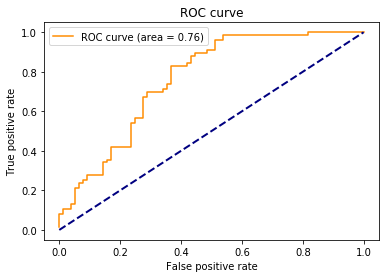

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf_enc.fit(clf_sr_over.apply(X_train_o))
rf_lm.fit(rf_enc.transform(clf_sr_over.apply(X_train_o)), y_train_o)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(clf_sr_over.apply(X_test_o)))[:, 1]

fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test_o, y_pred_rf_lm)
roc_auc = auc(fpr_rf_lm, tpr_rf_lm)

plt.plot(fpr_rf_lm, tpr_rf_lm, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

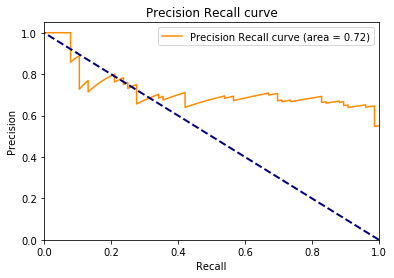

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test_o, y_pred_rf_lm)

precision, recall, _ = precision_recall_curve(y_test_o, y_pred_rf_lm)

plt.plot(recall, precision, color='darkorange', label='Precision Recall curve (area = %0.2f)' % average_precision)
plt.plot([1, 0], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.legend(loc='best')
plt.show()

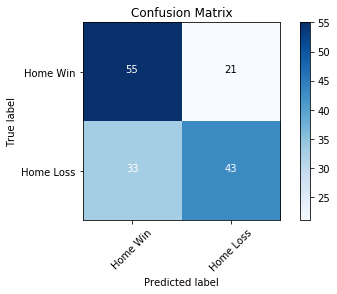

In [53]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred_cm = rf_lm.predict(rf_enc.transform(clf_sr_over.apply(X_test_o)))
cnf_matrix = confusion_matrix(y_test_o, y_pred_cm)
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Home Win','Home Loss'], rotation=45)
plt.yticks(tick_marks, ['Home Win','Home Loss'])

fmt = '.0f'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(2), range(2)):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
                horizontalalignment="center",
                color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()